# Clustering

## Table Of Contents
* [Question 1: Clustering](#chapter_1)
    * [Section 1.1: Importing the required libraries](#section_1_1)
    * [Section 1.2: Loading the input data csv file and importing it into dataframe](#section_1_2)
    * [Section 1.3: Exploratory Data Analysis (EDA)](#section_1_3)
        * [Section 1.3.1: Displaying the top 5 rows](#section_1_3_1)
        * [Section 1.3.2: Checking the data types](#section_1_3_2)
        * [Section 1.3.3: Returning True if all columns are numeric, False otherwise](#section_1_3_3)
        * [Section 1.3.4: Displaying the summary of data](#section_1_3_4)
        * [Section 1.3.5: Finding the total number of rows and columns](#section_1_3_5)
        * [Section 1.3.6: Finding the duplicate rows](#section_1_3_6)
        * [Section 1.3.7: Finding the duplicate columns](#section_1_3_7)
        * [Section 1.3.8: Finding the missing values](#section_1_3_8)
        * [Section 1.3.9: Finding the constant columns](#section_1_3_9)
        * [Section 1.3.10: Dropping the constant columns](#section_1_3_10)
    * [Section 1.4: Principal Component Analysis (PCA) for dimensionality reduction](#section_1_4)
        * [Section 1.4.1: Standardizing the data](#section_1_4_1)
        * [Section 1.4.2: Performing PCA on the standardized data](#section_1_4_2) 
        * [Section 1.4.3: Calculating the individual explained variances and the cumulative explained variances](#section_1_4_3)
        * [Section 1.4.4: Plotting the individual explained variances and the cumulative explained variances](#section_1_4_4)
        * [Section 1.4.5: Plotting the pairwise comparison of principal components](#section_1_4_5)
    * [Section 1.5: Clustering using k-means based on principal components](#section_1_5)
        * [Section 1.5.1: Finding an optimal k using Elbow method](#section_1_5_1)   
        * [Section 1.5.2: Finding an optimal k using Silhouette coefficient](#section_1_5_2) 
        * [Section 1.5.3: K-means clustering on principal components](#section_1_5_3)
    * [Section 1.6: Clustering using Gaussian Mixture Models (GMM) based on principal components](#section_1_6)
        * [Section 1.6.1: Minimizing the Bayesian information criterion (BIC) for optimal number of clusters k](#section_1_6_1) 
        * [Section 1.6.2: Minimizing the Akaike information criterion (AIC) for optimal number of clusters k](#section_1_6_2) 
        * [Section 1.6.3: GMM clustering on principal components](#section_1_6_3) 
    * [Section 1.7: Clustering using Density Based Spatial Clustering of Applications with Noise (DBSCAN) based on principal components](#section_1_7)
        * [Section 1.7.1: Finding the parameter epsilon by plotting K-distance Graph](#section_1_7_1)   
        * [Section 1.7.2: DBCAN clustering on principal components](#section_1_7_2)
    * [Section 1.8: Discussion](#section_1_8)

### Question 1: Clustering <a class="anchor" id="chapter_1"></a>

##### Section 1.1: Importing the required libraries <a class="anchor" id="section_1_1"></a>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Visualisation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

##### Section 1.2: Loading the input data csv file and importing it into dataframe <a class="anchor" id="section_1_2"></a>

In [3]:
inputFile = "C:\\Users\\Acer\\Desktop\\Big Data 2021\\Q1_X.csv"
data = pd.read_csv(inputFile)

An exploratory data analysis is performed with data 'Q1_X.csv' in order to understand the dataset by summarizing their main characteristics, either statistically or visually.

##### Section 1.3: Exploratory Data Analysis (EDA) <a class="anchor" id="section_1_3"></a>

##### Section 1.3.1: Displaying the top 5 rows <a class="anchor" id="section_1_3_1"></a>

In [4]:
print(data.head())

          X1         X2         X3         X4          X5         X6  \
0  -5.495677  61.106701  48.085207  -9.643993  115.686768  51.502108   
1  -9.162872  53.230089  65.145984   0.103767  115.381773  52.432896   
2  -3.405785  53.227501  68.409908   4.953268  113.306605  55.816941   
3  -3.892957  50.734035  57.628249   0.206105  114.054240  52.443588   
4  16.558304  45.606764  60.748764  10.325164  111.797910  46.308464   

          X7         X8         X9        X10    ...           X965  \
0  11.436144   7.812554   3.514711  15.311307    ...      61.828969   
1   1.177402   9.284462  19.596214  -6.731419    ...      41.601408   
2  -0.357535  13.769415  11.800787   8.593549    ...      64.159507   
3   2.150279   7.967559   3.736632  14.713485    ...      42.926548   
4  -4.504374  13.100508   7.022633  -5.327144    ...      74.297145   

        X966       X967       X968       X969        X970       X971  \
0   4.162347  77.341355  23.920747  12.231024  107.043789  36.421054

##### Section 1.3.2: Checking the data types <a class="anchor" id="section_1_3_2"></a>

In [5]:
print(data.dtypes)

X1      float64
X2      float64
X3      float64
X4      float64
X5      float64
X6      float64
X7      float64
X8      float64
X9      float64
X10     float64
X11     float64
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17       int64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
X24     float64
X25     float64
X26     float64
X27     float64
X28     float64
X29     float64
X30       int64
         ...   
X945    float64
X946    float64
X947    float64
X948    float64
X949    float64
X950    float64
X951    float64
X952    float64
X953    float64
X954    float64
X955    float64
X956    float64
X957    float64
X958    float64
X959    float64
X960    float64
X961    float64
X962    float64
X963    float64
X964    float64
X965    float64
X966    float64
X967    float64
X968    float64
X969    float64
X970    float64
X971    float64
X972    float64
X973    float64
X974    float64
Length: 974, dtype: obje

##### Section 1.3.3: Returning True if all columns are numeric, False otherwise <a class="anchor" id="section_1_3_3"></a>

In [6]:
print(data.shape[1] == data.select_dtypes(include=np.number).shape[1])

True


The above result shows that all features are numeric.

##### Section 1.3.4: Displaying the summary of data <a class="anchor" id="section_1_3_4"></a>

Checking the properties of the numeric features.

In [7]:
print(data.describe())

               X1          X2          X3          X4          X5          X6  \
count  560.000000  560.000000  560.000000  560.000000  560.000000  560.000000   
mean     0.396930   53.658139   55.997536    6.079391  112.930918   48.513380   
std      7.390763    8.735008    7.508624    6.205008    2.083350    6.948987   
min    -20.444201   24.769268   34.696121  -13.837288  107.354821   28.432552   
25%     -4.833082   47.670531   51.036831    2.027786  111.520228   43.766158   
50%      0.235658   52.954565   55.783190    5.816314  112.979777   48.539276   
75%      5.437610   58.915898   60.317126    9.921221  114.365004   53.334984   
max     20.418208   79.849986   77.275453   30.668662  120.527406   70.797001   

               X7          X8          X9         X10     ...            X965  \
count  560.000000  560.000000  560.000000  560.000000     ...      560.000000   
mean    -0.368146   12.769933    8.734618    0.239728     ...       46.515329   
std      4.306928    4.6701

##### Section 1.3.5: Finding the total number of rows and columns <a class="anchor" id="section_1_3_5"></a>

In [8]:
print(data.shape)

(560, 974)


The above result shows that the dataset is high dimensional that is, number of columns/features greater than number of rows/observations.

##### Section 1.3.6: Finding the duplicate rows <a class="anchor" id="section_1_3_6"></a>

In [9]:
print(data.duplicated().sum())

0


The above result shows that there are no duplicate rows.

##### Section 1.3.7: Finding the duplicate columns <a class="anchor" id="section_1_3_7"></a>

In [10]:
print(data.columns.duplicated().sum())

0


The above result shows that there are no duplicate columns.

##### Section 1.3.8: Finding the missing values <a class="anchor" id="section_1_3_8"></a>

In [11]:
print(data.isnull().sum().sum())

0


The above result shows that there is no missing value.

##### Section 1.3.9: Finding the constant columns <a class="anchor" id="section_1_3_9"></a>

In [12]:
print(data.columns[data.nunique() <= 1])

Index(['X12', 'X17', 'X27', 'X30', 'X35', 'X46', 'X47', 'X81', 'X105', 'X111',
       'X127', 'X131', 'X148', 'X149', 'X158', 'X168', 'X178', 'X191', 'X192',
       'X201', 'X204', 'X216', 'X234', 'X235', 'X242', 'X253', 'X266', 'X268',
       'X272', 'X278', 'X290', 'X297', 'X300', 'X314', 'X319', 'X327', 'X339',
       'X341', 'X356', 'X373', 'X386', 'X406', 'X408', 'X421', 'X429', 'X432',
       'X464', 'X466', 'X468', 'X477', 'X490', 'X493', 'X501', 'X510', 'X515',
       'X517', 'X526', 'X536', 'X545', 'X553', 'X580', 'X604', 'X616', 'X651',
       'X652', 'X662', 'X678', 'X679', 'X705', 'X709', 'X742', 'X744', 'X750',
       'X753', 'X765', 'X768', 'X771', 'X782', 'X790', 'X791', 'X805', 'X821',
       'X823', 'X824', 'X829', 'X843', 'X851', 'X856', 'X859', 'X867', 'X906',
       'X911', 'X919', 'X927', 'X935', 'X943', 'X949', 'X956'],
      dtype='object')


The above result shows that there are 98 constant columns.

##### Section 1.3.10: Dropping the constant columns <a class="anchor" id="section_1_3_10"></a>

In [13]:
index = data.columns[data.nunique() <= 1]
df = data.drop(list(index), axis=1)
print(df.shape)

(560, 876)


In the above result, 98 constant columns/features are dropped for building machine learning models. The reason is that the constant features won't affect the predictor that is, it do not add any variation in the data and thus, removing them also saves computational time.

From exploratory data analysis, we find that the number of features is large relative to the number of observations in the dataset, known as the "Curse of Dimensionality", which causes certain machine learning algorithms struggle to train effective models. This motivates to perform dimensionality reduction of the data.

##### Section 1.4: Principal Component Analysis (PCA) for dimensionality reduction <a class="anchor" id="section_1_4"></a>

Principal Component Analysis (PCA) is chosen as the desired dimensionality reduction technique. PCA projects each data point onto only the first few principal components to obtain lower dimensional data, while preserving maximum variance of the data. Simply, PCA transforms a large set of features into a smaller one, that still retains most of the information of all the features.

##### Section 1.4.1: Standardizing the data <a class="anchor" id="section_1_4_1"></a>

Data standardization of a feature means to scale the observations of the feature with mean 0 and standard deviation 1 given by the formula 

\begin{equation*}
Z = \frac{X - mean(X)}{sd(X)}
\end{equation*}.

In [14]:
df_std = StandardScaler().fit_transform(df) 

Before applying PCA, the features are standardized because it will give more importance to the features having higher variances than the features with low variances, while identifying the right principal components.The given data is standardized around mean 0 and with standard deviation 1. 

##### Section 1.4.2: Performing PCA on the standardized data <a class="anchor" id="section_1_4_2"></a>

In [15]:
pca = PCA(n_components = 10)
pca.fit_transform(df_std)

array([[-4.54551406,  1.42522916, -4.49524957, ...,  0.68031885,
        -3.01790085, -1.73819882],
       [ 0.56660608,  1.62110605,  1.11752318, ..., -4.05861068,
         1.17608277, -2.23540881],
       [-1.55419641,  2.85013147, -2.50246226, ..., -0.83990381,
         2.01754472, -0.80036668],
       ...,
       [12.67081272,  2.85542606,  0.33744272, ...,  1.67736934,
        -3.71152819,  3.79674975],
       [12.81389191,  2.02998593, -1.0693363 , ..., -0.13817457,
        -1.2379151 ,  0.73250027],
       [13.61238777,  1.39233886, -0.54999515, ...,  0.34742497,
        -0.57526166, -0.62122243]])

##### Section 1.4.3: Calculating the individual explained variances and the cumulative explained variances <a class="anchor" id="section_1_4_3"></a>

In [16]:
# Calculate the individual explained variances
pca_individual_variance = pca.explained_variance_
print(pca_individual_variance)

# Calculate the cumulative explained variances
pca_cumulative_variance = np.cumsum(pca_individual_variance)
print(pca_cumulative_variance)

[30.17523826 13.27281288  5.27936603  4.72721249  4.66237436  4.53329506
  4.48772196  4.46447088  4.35902574  4.30858473]
[30.17523826 43.44805114 48.72741717 53.45462966 58.11700402 62.65029907
 67.13802103 71.60249191 75.96151765 80.27010239]


The above result shows that 10 principal components are able to explain around 80% of the variance in the dataset.

##### Section 1.4.4: Plotting the individual explained variances and the cumulative explained variances <a class="anchor" id="section_1_4_4"></a>

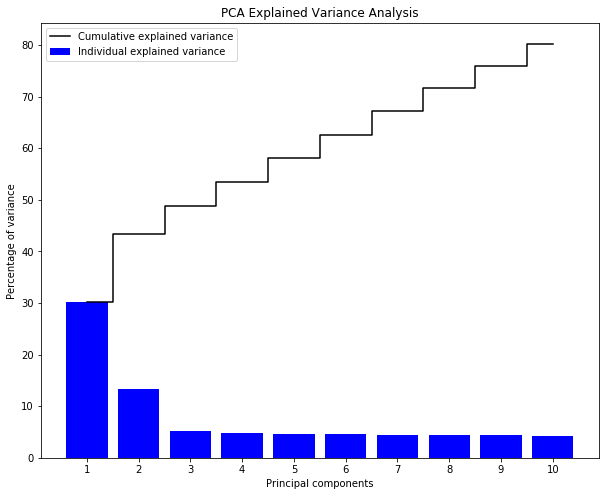

In [17]:
# Plot the explained variances
plt.figure(figsize=(10,8))
features = range(1,pca.n_components_+1)
plt.bar(features, pca_individual_variance, color='blue', label='Individual explained variance')
plt.step(features, pca_cumulative_variance, color='black', where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Percentage of variance')
plt.legend(loc='best')
plt.xticks(features)
plt.title('PCA Explained Variance Analysis')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_PCAExplainedVarianceAnalysis.png')
plt.show()

The above graph shows the percentage of variance (y-axis) captured depending on the number of principal components (x-axis).

##### Section 1.4.5: Plotting the pairwise comparison of principal components <a class="anchor" id="section_1_4_5"></a>

3 principal components is a reasonable choice according to the previous graph which explains around 50% of the variance in the dataset.

<Figure size 720x576 with 0 Axes>

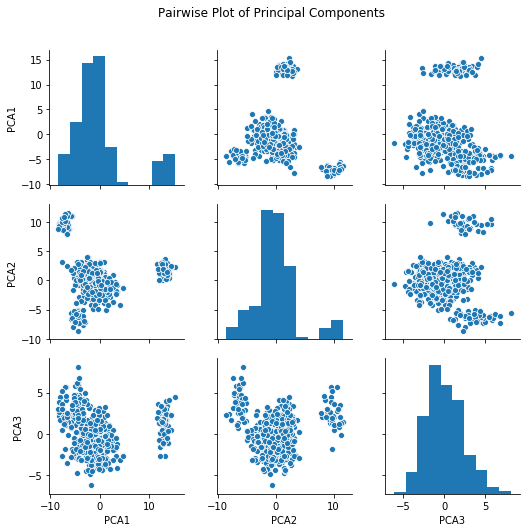

In [18]:
pca = PCA(n_components = 3)
pca_obj = pca.fit_transform(df_std)

pca_df = pd.DataFrame({'PCA1':pca_obj[:,0],'PCA2':pca_obj[:,1],'PCA3':pca_obj[:,2]})

plt.figure(figsize=(10,8))
sns.pairplot(pca_df, vars=['PCA1', 'PCA2', 'PCA3'])
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairwise Plot of Principal Components')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_PairwisePlotofPrincipalComponents.png')
plt.show()

The above graph shows that the pairwise plot of principal components is used to explore the data.

##### Section 1.5: Clustering using k-means based on principal components <a class="anchor" id="section_1_5"></a>

##### Section 1.5.1: Finding an optimal k using Elbow method <a class="anchor" id="section_1_5_1"></a>

For k-means clustering, Elbow method is often used to find the optimal number of clusters in the dataset.

To choose an optimal k for k-means clustering, the Within Cluster Sum of Squares (sum of the squared distance between each data point in the cluster and the cluster centroid) is plotted for different number of clusters. The plot shows the trend that the error decreases as the number of clusters increases. We select the optimal number of clusters where there is a sharp and steep fall of the distance (an elbow occurs). This approach is known as the Elbow method.

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(K, Sum_of_squared_distances, 'bo-',4,Sum_of_squared_distances[4]+1100, 'ro')
plt.annotate('Optimal number of clusters k = 4', xy=(4,Sum_of_squared_distances[4]+1500), xytext=(4.5, 7500),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Number of clusters k')
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow Method for Optimal k')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_ElbowMethodforOptimalk.png')
plt.show()

The above graph shows that there is a sharp fall of distance at k = 4. The optimal number of clusters using Elbow method is 4. Thus, there is a confusion to pick the best value of k.  

For higher dimensional data, it is better to employ the Silhouette method than the Elbow method to find an optimal k.

##### Section 1.5.2: Finding an optimal k using Silhouette coefficient <a class="anchor" id="section_1_5_2"></a>

The silhouette plot displays a measure of how close each data point in one cluster is to data points in the neighboring clusters. The range of the silhouette coefﬁcient is between [-1,1]. The Silhouette coefficient of +1 indicates that the data point is far away from the neighboring clusters. The Silhouette coefficient of 0 indicates that the data point is on the decision boundary between two neighboring clusters. The Silhouette coefficient <0 indicates overlapping clusters.

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.figure(figsize=(10,8))    
plt.plot(range(2, 11), silhouette_coefficients)
#plt.plot(3, silhouette_coefficients[1], 'ro')
plt.xticks(range(2, 11))
plt.title("Silhouette Method for Optimal k")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_SilhouetteMethodforOptimalk.png')
plt.show()    

The above graph shows that the optimal number of clusters using silhouette coefficient method is 3, or 4.

##### Section 1.5.3: K-means clustering on principal components <a class="anchor" id="section_1_5_3"></a>

K-means clustering is performed on principal components with 4 clusters.

In [ ]:
input_kmeans = pca_df
kmeans = KMeans(n_clusters=4,random_state=0)
y_kmeans = kmeans.fit_predict(input_kmeans)
input_kmeans['y_kmeans'] = y_kmeans

plt.figure(figsize=(10,8))

sns.pairplot(input_kmeans, hue='y_kmeans', vars=['PCA1', 'PCA2', 'PCA3'])   
plt.subplots_adjust(top=0.9)
plt.suptitle('K-means Clustering on Principal Components')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_KmeansClusteringonPrincipalComponents.png')
plt.show()

##### Section 1.6: Clustering using Gaussian Mixture Models (GMM) based on principal components <a class="anchor" id="section_1_6"></a>

##### Section 1.6.1: Minimizing the Bayesian Information Criterion (BIC) for optimal number of clusters k <a class="anchor" id="section_1_6_1"></a>

In [ ]:
bic_list = []
ranges = range(1,10)

for i in ranges:
    gmm = GaussianMixture(n_components=i).fit(pca_df)
    # BIC
    bic = gmm.bic(pca_df)
    bic_list.append(bic)

plt.figure(figsize=(10,8))
plt.plot(ranges, bic_list, label='BIC');
plt.legend(loc='best');
plt.xlabel('Number of clusters k');
plt.title('Minimizing the BIC for Optimal k');
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_MinimizingtheBICforOptimalk.png')
plt.show()

The above graph shows that the optimal number of clusters by minimizing the BIC is 4.

##### Section 1.6.2: Minimizing the Akaike Information Criterion (AIC) for optimal number of clusters k <a class="anchor" id="section_1_6_2"></a>

In [ ]:
aic_list = []
ranges = range(1,10)

for i in ranges:
    gmm = GaussianMixture(n_components=i).fit(pca_df)
    # AIC
    aic = gmm.aic(pca_df)
    aic_list.append(aic)

plt.figure(figsize=(10,8))
plt.plot(ranges, aic_list, label='AIC');
plt.legend(loc='best');
plt.xlabel('Number of clusters k');
plt.title('Minimizing the AIC for Optimal k')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_MinimizingtheAICforOptimalk.png')
plt.show()

The above graph shows that the optimal number of clusters by minimizing the AIC is 4.

##### Section 1.6.3: GMM clustering on principal components <a class="anchor" id="section_1_6_3"></a>

GMM clustering is performed on principal components with 4 clusters.

In [ ]:
input_gmm = pca_df
gmm = GaussianMixture(n_components=4,random_state=0)
gmm.fit(input_gmm)
y_gmm = gmm.predict(input_gmm)
input_gmm['y_gmm'] = y_gmm

plt.figure(figsize=(10,8))
sns.pairplot(input_gmm, hue='y_gmm', vars=['PCA1', 'PCA2', 'PCA3'])  
plt.subplots_adjust(top=0.9)
plt.suptitle('GMM Clustering on Principal Components')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_GMMClusteringonPrincipalComponents.png')
plt.show()

##### Section 1.7:  Clustering using Density Based Spatial Clustering of Applications with Noise (DBSCAN) based on principal components <a class="anchor" id="section_1_7"></a>

##### Section 1.7.1: Finding the parameter epsilon by plotting K-distance graph <a class="anchor" id="section_1_7_1"></a>

eps is chosen by using a k-distance graph where k = minPts-1 nearest neighbor.

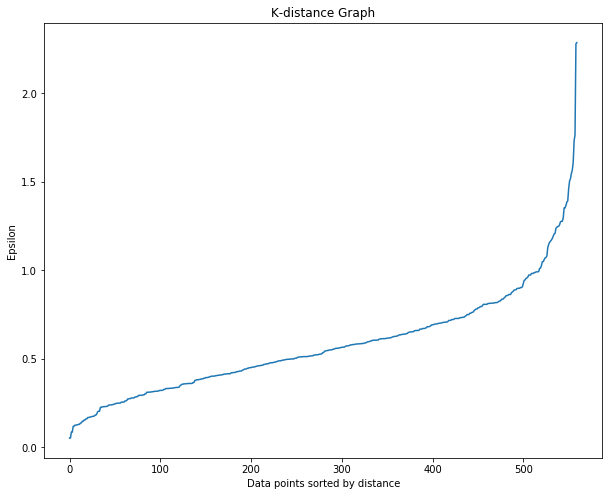

In [20]:
input_dbscan = pca_df
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(input_dbscan)
distances, indices = nbrs.kneighbors(input_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data points sorted by distance')
plt.ylabel('Epsilon')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_KdistanceGraph.png')
plt.show()

##### Section 1.7.2: DBCAN clustering on principal components <a class="anchor" id="section_1_7_2"></a>

minPts = 2*D where D is the number of dimensions in the data set.

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x576 with 0 Axes>

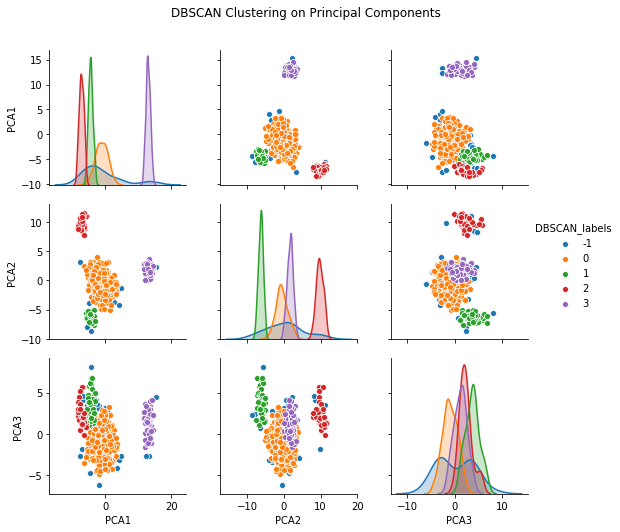

In [21]:
dbscan=DBSCAN(eps=1.3,min_samples=4)
dbscan.fit(input_dbscan)
y_dbscan = dbscan.fit_predict(input_dbscan)

input_dbscan['DBSCAN_labels']=y_dbscan

# Plotting the resulting clusters
plt.figure(figsize=(10,8))
sns.pairplot(input_dbscan, hue='DBSCAN_labels', vars=['PCA1', 'PCA2', 'PCA3']) 
plt.subplots_adjust(top=0.9)
plt.suptitle('DBSCAN Clustering on Principal Components')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\plot_DBSCANClusteringonPrincipalComponents.png')
plt.show()

##### Section 1.8: Discussion <a class="anchor" id="section_1_8"></a>

1. From exploratory data analysis of the given dataset, it is found that there are constant columns. A machine learning model is given by the mathematical equation Y = f(X) in which Y = dependent variable and X = independent variables. Thus, machine learning models estimates values of Y given values of X. When a whole column of X is constant, then the relationship between Y and X is meaningless because it doesn't add any variation in the data. Moreover, it increases computational time. Hence, the constant columns are removed from the data.

2. PCA is a powerful dimensionality reduction method. PCA reduces the dimension of the data from p = 974 to p = 3 while preserving maximum variance of the data.

3. K-means is a distance based clustering method. Thus, it works well when clusters are well separated. It is a simple algorithm, which works well when the clusters are approximately round, but it can not deal with noisy, elongated, or partially overlapping clusters. 

4. GMM is a probabilistic approach to clustering which works similarly like k-means, but it assumes input variables are a mix of Gaussian distributions. As a result, it can deal much better with elongated, overlapping, and noisy clusters. 

5. DBSCAN, is a density based clustering algorithm. It works well for data which contains clusters of a similar density. DBSCAN groups together data points which are densely packed together. Because of that, it can discover well-defined clusters even from very irregular-shaped distributions (which is what most real-life data is like!) The downside is that DBSCAN is more computationally intensive and requires some tuning. For example, it has a parameter that determines how closely the points need to be to be part of the same cluster. If you set it too low, you may get thousands of tiny clusters. If you set it too high, you may get one giant cluster.  